# Base de conhecimento "Music Dataset: Song Information and Lyrics"

# Preparação de ambiente

In [1]:
!pip install spacy --upgrade
!python -m spacy download en_core_web_sm

import spacy
import en_core_web_sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-11-06 22:33:14.062024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 22:33:14.062118: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: A

In [57]:
nlp = spacy.load('en_core_web_sm')

drive.mount('/content/drive', force_remount=True)
songs = pd.read_csv('/content/drive/MyDrive/PLN/movie.original.csv',
                    header=0,
                    skiprows=1,
                    names=['Texto', 'Classificacao'], encoding='latin1')
nlp

Mounted at /content/drive


In [58]:
songs

,Texto,Classificacao
0,"When I put this movie in my DVD player, and sa...",0
1,Why do people who do not know what a particula...,0
2,Even though I have great interest in Biblical ...,0
3,Im a die hard Dads Army fan and nothing will e...,1
4,A terrible movie as everyone has said. What ma...,0
...,...,...
39994,"""Western Union"" is something of a forgotten cl...",1
39995,This movie is an incredible piece of work. It ...,1
39996,My wife and I watched this movie because we pl...,0
39997,"When I first watched Flatliners, I was amazed....",1


# Manipulação da Base de conhecimento

In [77]:
x = songs.iloc[:,0].values
y = songs.iloc[:,1].values

x,_, y,_ = train_test_split(x, y, test_size=0.98)

len(x), len(y)

(799, 799)

False

In [32]:
def preprocessing(sentence):
  sentence = re.sub(r'@[A-Za-z0-9]+', ' ', str(sentence))

  sentence = sentence.lower()
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop
                                                          or token.like_num
                                                          or token.is_punct
                                                          or token.is_space
                                                          or len(token) == 1)]
  tokens = ' '.join(tokens)

  return tokens

In [78]:
x_songs_cleaned = [preprocessing(songs) for songs in x]
x_teste_cleaned = [preprocessing(songs) for songs in x]

# Treinamento de árvore


In [37]:
x_songs_cleaned[0:5]

['watching dick tracy years result vital life childhood seeing adult good movie dark satiric incredibly misunderstood thing said oscar nomination pacino received rarely discussed fuss came out.<br /><br />pacino good effect clearly having loads fun beatty great dick tracy camera manages capture atmosphere film noir comic book better film possibly seen taking look scene film breathtaking lighting velvet overtones smog smoke combine create great effect.<br /><br />there funny cameos including dustin hoffman mumbles think flaws terms acting mandatory kid character far better expected.<br /><br />overall fine movie misunderstood years release incredibly underrated average imdb critics reviews positive check rottentomatoes.com seeing film hard perfect example capturing essence comic book style eccentricity.<br /><br />highly recommended stars',
 'enjoyable fast paced br /><br />there way earth actor playing mat main thing act convincingly credit audition convinced cast soon accepted naive y

In [38]:
len(y)

1249

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
x_songs_tfidf = vectorizer.fit_transform(x_songs_cleaned)

In [40]:
x_songs_tfidf.toarray().shape

(1249, 19979)

In [43]:
def preprocessing_lemma(sentence):
  tokens = [token.lemma_ for token in nlp(sentence)]
  tokens = ' '.join(tokens)

  return tokens

In [80]:
x_songs_cleaned_lemma = [preprocessing_lemma(songs) for songs in x_songs_cleaned]
x_songs_tfidf = vectorizer.fit_transform (x_songs_cleaned_lemma)

x_teste_cleanned_lemma = [preprocessing_lemma(songs) for songs in x_teste_cleaned]
x_teste_tfidf = vectorizer.transform(x_teste_cleanned_lemma)

x_songs_tfidf.shape, x_teste_tfidf.shape

((799, 13071), (799, 13071))

In [81]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_songs_tfidf, y)

DecisionTreeClassifier(criterion='entropy')

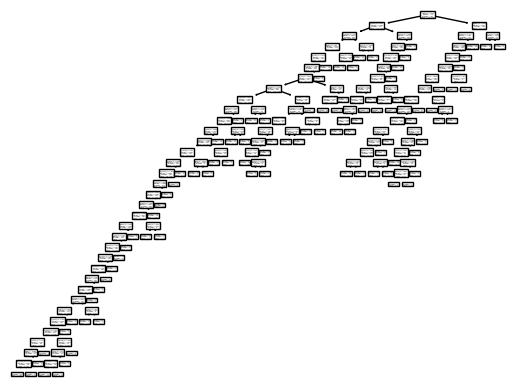

In [82]:
plt.show(tree.plot_tree(model))

In [83]:
predictions = model.predict(x_teste_tfidf)
predictions

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [84]:
accuracy_score(y, predictions)

1.0

In [98]:
cm = confusion_matrix(y, predictions)
cm

array([[396,   0],
       [  0, 403]])

In [97]:
def avalie(sentence):
  x_teste_cleaned.append(sentence)
  x_teste_cleanned_lemma = [preprocessing_lemma(sentence) for sentence in x_teste_cleaned]
  x_teste_tfidf = vectorizer.transform(x_teste_cleanned_lemma)

  predictions = model.predict(x_teste_tfidf)
  score = predictions[-1]

  print(f'Classificação: {score}')

  if score == 0:
    return 'frase negativa'

  return 'frase positiva'

In [99]:
frase_usuario = input('Digite uma frase: ')

avaliacao = avalie(frase_usuario)

print(f'A frase "{frase_usuario}" é uma {avaliacao}'.title())

Digite uma frase: this movie is boring, i hate it
Classificação: 0
A Frase "This Movie Is Boring, I Hate It" É Uma Frase Negativa
